<a href="https://colab.research.google.com/github/Swapnadeepgit/Timeseries_ML/blob/main/timeseries_ARmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autoregressive models are statistical models used for time series analysis, where current values are predicted based on a linear combination of past values.

In [ ]:
! pip install statsmodels --upgrade


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.tsa .ar_model as ar_model
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/daily-min-temperatures.csv',index_col=0, parse_dates=True)
X=df.values
print('Shape of data \t',df.shape)
print('original dataset \t',df.head())
print('after only extracting temp \t',X)

Shape of data 	 (3650, 1)
original dataset 	             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
after only extracting temp 	 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

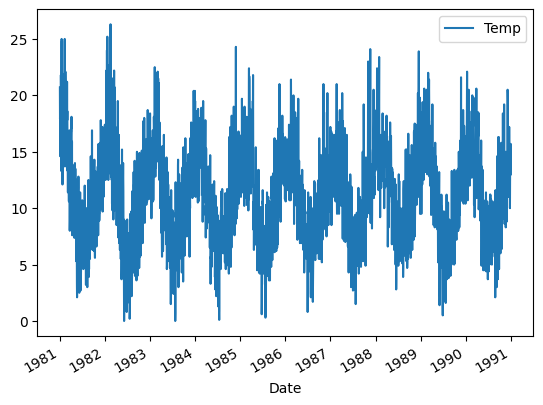

In [ ]:
df.plot(s)

Checking for stationarity by ADF test


In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(X, autolag='AIC')
print('Results of Dickey-Fuller Test:')
print('Test Statistic \t',dftest[0])
print('p-value \t',dftest[1])
print("no. of lags :", dftest[2])
print ("no.of observation")
print('Critical Values \t',dftest[4])

Results of Dickey-Fuller Test:
Test Statistic 	 -4.4448049246117
p-value 	 0.0002470826300360994
no. of lags : 20
Critical Values 	 {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}


Using partial autocorrelation function over auto correlation function


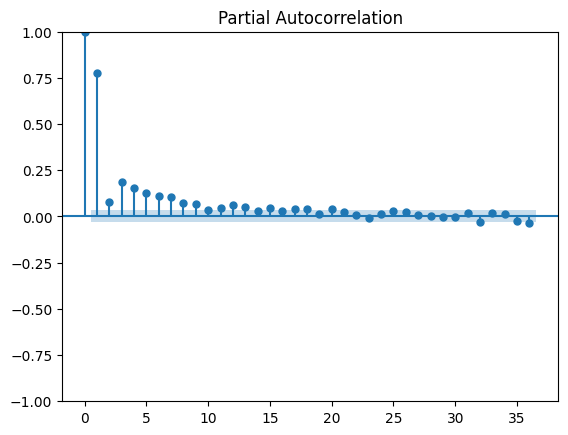

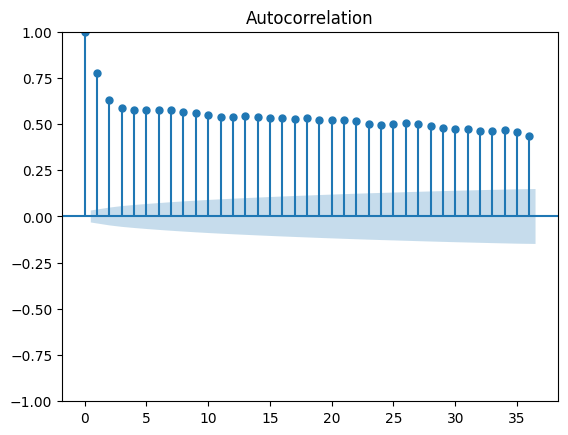

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(X)
acf=plot_acf(X)
plt.show()

splitting the data into train and test for last 7 days

In [ ]:
#import the AutoReg function
from statsmodels.tsa.ar_model import AutoReg

In [ ]:

train=X[:len(X)-7]
test=X[len(X)-7:]
model= AutoReg (train,lags=10).fit()
model

In [ ]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Thu, 16 Jan 2025   AIC                          16775.028
Time:                        03:50:30   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [ ]:
#masking predictions using the model
predictions=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)

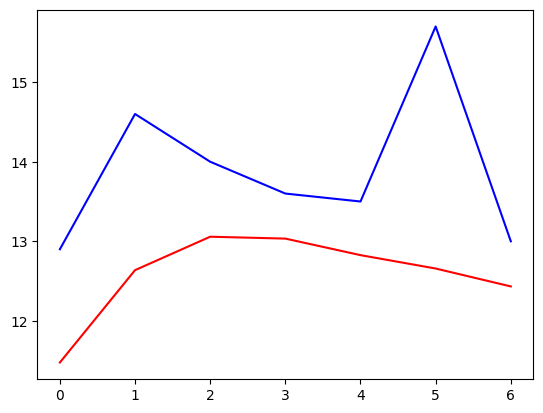

In [ ]:
from matplotlib import pyplot as plt
plt.plot(test[0:100],color='blue')
plt.plot(predictions[0:100],color='red')
plt.show()

In [ ]:
#calculate error
from math import sqrt
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)
print('Test MSE: %.3f' % error)
rmse = np.sqrt(error)
print('Test RMSE: %.3f' % rmse)

Test MSE: 2.446
Test RMSE: 1.564


In [ ]:
#making future predictions based on the data set
future_predictions=model.predict(start=len(X)+1,end=len(X)+10,dynamic=False)
print("The future predictions dfor next 10 days based on the dataset",future_predictions)

The future predictions dfor next 10 days based on the dataset [12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712 12.16696099 12.12395241 12.09288786]
